In [34]:
import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from sklearn.model_selection import ShuffleSplit, train_test_split

def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):

        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')

        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')

        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)
    
    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y,
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')
    print(test_scores)
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()


In [35]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('owid-covid-data.csv')
data = data.get(["new_cases", "new_tests", "population", "population_density", "median_age"])
data = data[data.new_cases >= 0]
data = data[data.new_cases <= 40000]
# data = data[data.new_tests <= 50000]
data = data.dropna()

cases = data['new_cases']
features = data.drop('new_cases', axis = 1)

# Success - Display the first record
display(features.head(n=10))

# Success
print("Covd-19 dataset has {} data points with {} variables each.".format(*data.shape))

,new_tests,population,population_density,median_age
872,1520.0,45195777.0,16.177,31.9
873,1529.0,45195777.0,16.177,31.9
874,1648.0,45195777.0,16.177,31.9
877,3047.0,45195777.0,16.177,31.9
878,1569.0,45195777.0,16.177,31.9
879,2083.0,45195777.0,16.177,31.9
880,2193.0,45195777.0,16.177,31.9
881,2292.0,45195777.0,16.177,31.9
882,1770.0,45195777.0,16.177,31.9
883,1856.0,45195777.0,16.177,31.9


Covd-19 dataset has 6465 data points with 5 variables each.


Training and testing split was successful.
[[0.65191619 0.67479751 0.56020976 0.71093057 0.58155261 0.45911238
  0.63291853 0.68949779 0.61194752 0.57997571]
 [0.81827645 0.79106709 0.69916973 0.82222449 0.72264719 0.60386593
  0.75190986 0.80642929 0.78582037 0.75404563]
 [0.90066132 0.8862781  0.78416084 0.92922089 0.86420513 0.75480358
  0.86116259 0.90816258 0.88055533 0.86319516]
 [0.90426234 0.89040503 0.84629376 0.93884303 0.87574377 0.83054476
  0.87805281 0.92283224 0.88929315 0.88112742]
 [0.92843376 0.87445764 0.90214999 0.95203288 0.89521411 0.87531336
  0.89428561 0.92096145 0.9033657  0.91261048]
 [0.93792208 0.88098317 0.90160781 0.95055559 0.88648848 0.90142151
  0.91497565 0.90611238 0.91328246 0.93290381]
 [0.94892691 0.89377411 0.91561013 0.9461158  0.90551182 0.88595879
  0.8958626  0.91648713 0.925451   0.94755323]
 [0.95235227 0.88641861 0.91358172 0.94161644 0.89800043 0.88620144
  0.91213049 0.91419548 0.93019581 0.95164745]
 [0.95221781 0.89352083 0.91206085 0.

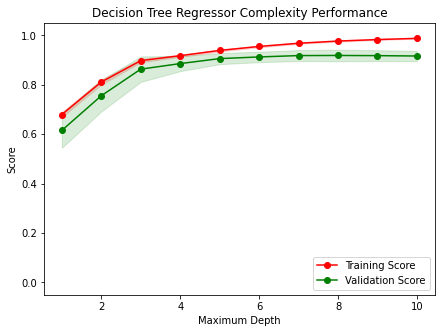

In [36]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split


# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, cases, test_size=0.2, random_state=2)

# Success
print("Training and testing split was successful.")
ModelComplexity(X_train, y_train)